In [1]:
import os
import json
import numpy as np
import torch
import result
import pandas as pd
from rnn_model import LSTMNet, GRUNet
from utils import DotDict, Logger, rmse, rmse_tensor, rmse_np, boolean_string, get_dir, get_time, next_dir, model_dir, get_model
from get_dataset import get_time_data, get_stnn_data
from stnn import *
import matplotlib.pyplot as plt
from matplotlib import axis
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
%matplotlib inline

%load_ext autoreload
%autoreload 2
%reload_ext autoreload


Using TensorFlow backend.


# pred 3 time step

## Best Jar

In [3]:
best_jar_folder = os.path.abspath(os.path.join(os.getcwd(), '..', 'output_result', 'best_jar_3'))
jar_result = result.Printer(best_jar_folder)
pd.options.display.max_rows = None
# a = jar_result.get_df(col=['train_loss', 'test_loss', 'mode']).sort_values('test_loss', ascending=True)
jar_df = jar_result.get_df(col=['final_sum_score', 'final_rmse_score', 'activation', 'data_normalize', 'nlayers', 'nhid', 'activation', 'nx'], increase=False).sort_values('final_rmse_score')
jar_df

final_sum_score final_rmse_score  \
ori-stnn_05-11-00-03-30_8934               3950.13          212.221   
v3-stnn_05-11-00-03-30_4097                4074.89          218.507   
classical-stnn_06-18-17-27-54_5565         2672.84          251.346   
classical-stnn_06-18-17-17-09_7715         1713.78          322.324   
v1-stnn_05-11-00-08-18_2934                 8489.4          467.777   
v3-stnn_05-11-00-08-18_4608                1244.87          566.689   
ori-stnn_05-11-00-08-18_1987               489.481          610.887   
keras-rnn_05-12-11-00-42_5547              574.921          968.729   
keras-rnn_05-12-11-00-42_1851              6983.14          11849.4   
keras-rnn_07-09-22-14-54_9595                  NaN              NaN   
keras-rnn_07-09-22-18-26_5985                  NaN              NaN   

                                   activation data_normalize nlayers nhid  \
ori-stnn_05-11-00-03-30_8934             tanh              x       2  100   
v3-stnn_05-11-00-03-30_4097              tanh              x       2  100   
classical-stnn_06-18-17-27-54_5565    sigmoid              d       3  100   
classical-stnn_06-18-17-17-09_7715    sigmoid              d       3  100   
v1-stnn_05-11-00-08-18_2934           sigmoid              x       4  100   
v3-stnn_05-11-00-08-18_4608              tanh              d       4  100   
ori-stnn_05-11-00-08-18_1987             tanh              d       4  100   
keras-rnn_05-12-11-00-42_5547            tanh            NaN       1  100   
keras-rnn_05-12-11-00-42_1851            tanh            NaN       1  100   
keras-rnn_07-09-22-14-54_9595            tanh            NaN       1  100   
keras-rnn_07-09-22-18-26_5985            tanh            NaN       3  100   

                                   activation  nx  
ori-stnn_05-11-00-03-30_8934             tanh  31  
v3-stnn_05-11-00-03-30_4097              tanh  31  
classical-stnn_06-18-17-27-54_5565    sigmoid  31  
classical-stnn_06-18-17-17-09_7715    sigmoid  31  
v1-stnn_05-11-00-08-18_2934           sigmoid  31  
v3-stnn_05-11-00-08-18_4608              tanh  31  
ori-stnn_05-11-00-08-18_1987             tanh  31  
keras-rnn_05-12-11-00-42_5547            tanh   1  
keras-rnn_05-12-11-00-42_1851            tanh   1  
keras-rnn_07-09-22-14-54_9595            tanh  31  
keras-rnn_07-09-22-18-26_5985            tanh  31

In [7]:
jar_rnn_sum = {'GRU': 'keras-rnn_07-09-22-14-54_9595', 'LSTM': 'keras-rnn_07-09-22-18-26_5985'}
result.output_scr_by_dir(jar_rnn_sum, best_jar_folder, model='rnn', write='a', minepoch='rmse')

In [4]:
jar_all_sum = {'v0': 'ori-stnn_05-11-00-08-18_1987', 'v1': 'v1-stnn_05-11-00-08-18_2934', 'v2': 'v3-stnn_05-11-00-08-18_4608', 'GRU': 'keras-rnn_05-12-11-00-42_5547', 'LSTM': 'keras-rnn_05-12-11-00-42_1851'}
jar_all_rmse = {'v0': 'ori-stnn_05-11-00-03-30_8934', 'v1': 'v1-stnn_05-11-00-08-18_2934', 'v2': 'v3-stnn_05-11-00-03-30_4097', 'GRU': 'keras-rnn_05-12-11-00-42_5547', 'LSTM': 'keras-rnn_05-12-11-00-42_1851'}

jar_stnn_sum = {'v0': 'ori-stnn_05-11-00-08-18_1987', 'v1': 'v1-stnn_05-11-00-08-18_2934', 'v2': 'v3-stnn_05-11-00-08-18_4608'}
jar_stnn_rmse = {'v0': 'ori-stnn_05-11-00-03-30_8934', 'v1': 'v1-stnn_05-11-00-08-18_2934', 'v2': 'v3-stnn_05-11-00-03-30_4097'}

jar_rnn_sum = {'GRU': 'keras-rnn_05-12-11-00-42_5547', 'LSTM': 'keras-rnn_05-12-11-00-42_1851'}
jar_rnn_rmse = {'GRU': 'keras-rnn_05-12-11-00-42_5547', 'LSTM': 'keras-rnn_05-12-11-00-42_1851'}

jar_rnn
3950.131505543013
8489.40008534622
4074.8872108242726
574.92095878316
6983.14431578328


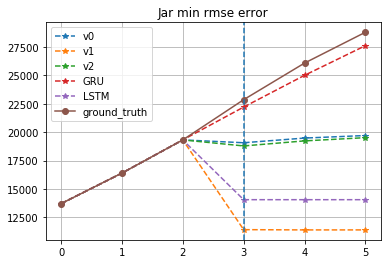

({'v0': array([13711.        , 16399.        , 19320.        , 19071.14938396,
         19482.25730014, 19706.36015558]),
  'v1': array([13711.        , 16399.        , 19320.        , 11424.44917464,
         11401.21590602, 11402.11371452]),
  'v2': array([13711.        , 16399.        , 19320.        , 18789.81414789,
         19233.78611207, 19517.91911852]),
  'GRU': array([13711.        , 16399.        , 19320.        , 22210.6015625 ,
         25002.95117188, 27611.26171875]),
  'LSTM': array([13711.        , 16399.        , 19320.        , 14061.15527344,
         14060.65625   , 14060.85546875])},
 array([13711., 16399., 19320., 22859., 26079., 28793.]))

In [4]:
result.plot_pred_by_dir(jar_min_rmse, best_jar_folder, train=False, increase=False, line_time=3, title='Jar min rmse error')

jar_rnn
489.4813146094229
8489.40008534622
1244.8709091204194
574.92095878316
6983.14431578328


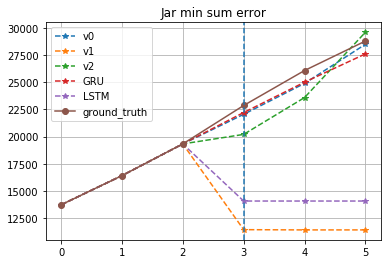

({'v0': array([13711.        , 16399.        , 19320.        , 22044.84011841,
         24894.22055054, 28493.38531494]),
  'v1': array([13711.        , 16399.        , 19320.        , 11424.44917464,
         11401.21590602, 11402.11371452]),
  'v2': array([13711.        , 16399.        , 19320.        , 20197.18039703,
         23588.10517883, 29603.85856628]),
  'GRU': array([13711.        , 16399.        , 19320.        , 22210.6015625 ,
         25002.95117188, 27611.26171875]),
  'LSTM': array([13711.        , 16399.        , 19320.        , 14061.15527344,
         14060.65625   , 14060.85546875])},
 array([13711., 16399., 19320., 22859., 26079., 28793.]))

In [5]:
result.plot_pred_by_dir(jar_min_sum, best_jar_folder, train=False, increase=False, line_time=3, title='Jar min sum error')

In [16]:
# result.output_scr_by_dir(jar_stnn_rmse, best_jar_folder, minepoch='rmse')
result.output_scr_by_dir(jar_rnn_rmse, best_jar_folder, minepoch='rmse', write='a', model='rnn')


In [ ]:
# python train_stnn_v0.py --test False --activation tanh --batch_size 1000 --dataset jar --increase False --lambd 10.0 --lr 0.001 --manualSeed 1892 --mode None --nhid 100 --nlayers 2 --nt_train 12 --data_normalize x --nz 10 --sch_bound 230 --patience 200 --start_time 0 --validation_length 3 --time_datas confirmed --nepoch 5000 --test True

# python train_stnn_v3.py --test False --activation tanh --batch_size 1000 --dataset jar --increase False --lambd 10.0 --lr 0.001 --manualSeed 7751 --mode None --nhid 100 --nlayers 2 --nt_train 12 --data_normalize x --nz 10 --sch_bound 230 --patience 100 --start_time 0 --validation_length 3 --time_datas confirmed --nepoch 1604 --test True & 


## Best Feb

In [6]:
best_feb_folder = os.path.abspath(os.path.join(os.getcwd(), '..', 'output_result', 'best_feb_3'))
feb_result = result.Printer(best_feb_folder)
pd.options.display.max_rows = None
# a = feb_result.get_df(col=['train_loss', 'test_loss', 'mode']).sort_values('test_loss', ascending=True)
feb_df = feb_result.get_df(col=['minsum', 'final_sum_score', 'final_rmse_score', 'activation', 'nhid', 'nlayers'], increase=False).sort_values('final_rmse_score')
feb_df

minsum final_sum_score final_rmse_score  \
classical-stnn_06-18-17-26-18_8849  358.885         945.885           64.808   
v3-stnn_05-12-16-58-50_8071         250.281         668.072          72.3393   
ori-stnn_05-12-16-06-12_0454         767.62         933.935          80.8261   
v1-stnn_05-12-16-06-13_8446         1814.66         2125.25          144.493   
v3-stnn_05-03-23-45-57_6570             NaN         281.599          437.676   
keras-rnn_05-12-15-30-37_0911           NaN         329.841           470.11   
ori-stnn_05-11-00-03-30_9789          1e+08         108.205          514.625   
v3-stnn_05-11-00-08-18_8059           1e+08         38.3702          909.492   
v1-stnn_05-11-00-03-30_1801           1e+08         681.387          1050.03   
classical-stnn_06-18-17-21-50_7784  358.885         358.885          1357.91   
keras-rnn_05-12-15-30-37_4449           NaN         859.419          1486.21   
keras-rnn_07-10-08-20-13_8721           NaN             NaN              NaN   
keras-rnn_07-10-08-24-51_6692           NaN             NaN              NaN   

                                   activation nhid nlayers  
classical-stnn_06-18-17-26-18_8849    sigmoid   50       3  
v3-stnn_05-12-16-58-50_8071           sigmoid  100       2  
ori-stnn_05-12-16-06-12_0454          sigmoid  100       4  
v1-stnn_05-12-16-06-13_8446              tanh  100       4  
v3-stnn_05-03-23-45-57_6570           sigmoid    0       1  
keras-rnn_05-12-15-30-37_0911            tanh  100       1  
ori-stnn_05-11-00-03-30_9789             tanh  100       2  
v3-stnn_05-11-00-08-18_8059              tanh  100       2  
v1-stnn_05-11-00-03-30_1801              tanh  100       4  
classical-stnn_06-18-17-21-50_7784    sigmoid   50       3  
keras-rnn_05-12-15-30-37_4449            tanh  100       2  
keras-rnn_07-10-08-20-13_8721            tanh  100       1  
keras-rnn_07-10-08-24-51_6692            tanh  100       3

In [7]:
feb_min_rmse = {'v0': 'ori-stnn_05-12-16-06-12_0454', 'v1': 'v1-stnn_05-12-16-06-13_8446', 'v2': 'v3-stnn_05-12-16-58-50_8071', 'GRU': 'keras-rnn_05-12-15-30-37_0911', 'LSTM': 'keras-rnn_05-12-15-30-37_4449'}
feb_min_sum = {'v0': 'ori-stnn_05-11-00-03-30_9789', 'v1': 'v1-stnn_05-11-00-03-30_1801', 'v2': 'v3-stnn_05-11-00-08-18_8059', 'GRU': 'keras-rnn_05-12-15-30-37_0911', 'LSTM': 'keras-rnn_05-12-15-30-37_4449'}

feb_stnn_rmse = {'v0': 'ori-stnn_05-12-16-06-12_0454', 'v3': 'v3-stnn_05-12-16-58-50_8071', 'classical': 'classical-stnn_06-18-17-26-18_8849'}
feb_stnn_sum = {'v0': 'ori-stnn_05-11-00-03-30_9789', 'v1': 'v1-stnn_05-11-00-03-30_1801', 'v2': 'v3-stnn_05-11-00-08-18_8059'}

feb_rnn_rmse = {'GRU': 'keras-rnn_05-12-15-30-37_0911', 'LSTM': 'keras-rnn_05-12-15-30-37_4449'}

In [8]:
# result.output_scr_by_dir(feb_stnn_rmse, best_feb_folder, write='a')
result.output_scr_by_dir(feb_rnn_rmse, best_feb_folder, write='a', model='rnn', minepoch='rmse')


feb_rnn
933.9354277852153
2125.249202079975
668.0733393200725
329.8412450047454
859.419348454706


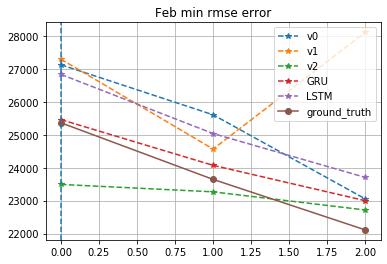

({'v0': array([27127.21984863, 25606.99743652, 23051.23950195]),
  'v1': array([27295.40518007, 24566.19678235, 28114.77927196]),
  'v2': array([23491.17565918, 23265.85333252, 22714.33624268]),
  'GRU': array([25459.61914062, 24071.3828125 , 22996.33203125]),
  'LSTM': array([26834.13671875, 25036.92382812, 23704.58007812])},
 array([25364., 23644., 22109.]))

In [8]:
result.plot_pred_by_dir(feb_min_rmse, best_feb_folder, train=False, increase=False, line_time=0, title='Feb min rmse error')

feb_rnn
108.20452957614434
681.3879360659245
38.369883509366524
329.8412450047454
859.419348454706


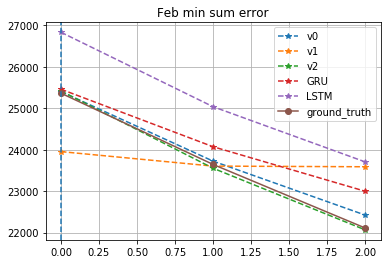

({'v0': array([25403.42236328, 23723.61883545, 22421.21899414]),
  'v1': array([23953.47991943, 23603.97363281, 23587.99853516]),
  'v2': array([25417.23565674, 23552.34051514, 22064.11419678]),
  'GRU': array([25459.61914062, 24071.3828125 , 22996.33203125]),
  'LSTM': array([26834.13671875, 25036.92382812, 23704.58007812])},
 array([25364., 23644., 22109.]))

In [9]:
result.plot_pred_by_dir(feb_min_sum, best_feb_folder, train=False, increase=False, line_time=0, title='Feb min sum error')

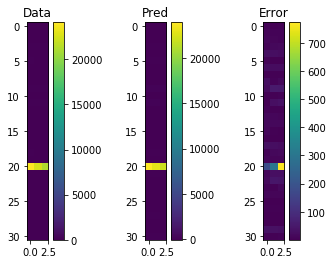

In [7]:
exp_name = 'v3-stnn_05-03-23-45-57_6570'
exp_path = best_feb_folder
exp = result.Exp(exp_name, exp_path)
exp.plot_distribution()

## Mar

In [5]:
best_mar_folder = os.path.abspath(os.path.join(os.getcwd(), '..', 'output_result', 'best_mar_3'))
mar_result = result.Printer(best_mar_folder)
pd.options.display.max_rows = None
# a = mar_result.get_df(col=['train_loss', 'test_loss', 'mode']).sort_values('test_loss', ascending=True)
mar_df = mar_result.get_df(col=['nhid', 'minrmse', 'final_rmse_score', 'activation', 'data_normalize', 'nz', 'lambd', 'nlayers', 'mode'], increase=False).sort_values('minrmse')
mar_df

nhid      minrmse final_rmse_score  \
keras-rnn_05-13-10-07-37_3329       100   4.2812e-07          280.692   
keras-rnn_07-09-21-59-55_1719       100  9.06092e-06              NaN   
keras-rnn_07-09-21-50-38_9334       100  4.43888e-05              NaN   
keras-rnn_05-13-09-46-48_9884       100    0.0279205          4048.68   
ori-stnn_05-12-18-19-44_4341          0      3.22383          3.22383   
ori-stnn_05-12-18-19-44_8331          0      3.22383          3.22383   
v3-stnn_05-12-18-19-44_7937           0      3.47394          3.47394   
v3-stnn_05-12-18-19-44_5871           0      5.56308          5.91296   
v3-stnn_06-18-17-32-29_6925           0      5.56682          6.73858   
v3-stnn_06-18-17-32-29_2388           0      5.63446          13.4722   
v3-stnn_06-18-17-32-29_6895           0      5.87136          14.7294   
v3-stnn_06-18-17-32-29_5544           0      5.97486          15.9434   
ori-stnn_06-18-17-37-02_9716          0      12.1652          30.9278   
ori-stnn_06-18-17-37-02_6270          0      12.5583           67.138   
ori-stnn_06-18-17-37-02_1924          0      12.7661           52.278   
ori-stnn_07-10-22-52-40_4606        100      52.5268          54.4806   
v3-stnn_07-10-22-52-40_5409         100      53.8135          63.8533   
ori-stnn_07-10-22-52-40_9538        100      54.4753          55.7717   
v3-stnn_07-10-22-52-40_8929         100      55.1465          67.8524   
v3-stnn_07-10-22-52-40_3354         100      57.0709          63.8704   
ori-stnn_07-10-22-52-40_3336        100      57.1969          62.1409   
classical-stnn_06-18-17-25-23_1864   50      57.6412          57.6412   
ori-stnn_07-10-22-52-40_1627        100      57.8288          60.7257   
v3-stnn_07-10-22-52-40_0082         100      57.9729          64.5767   
v3-stnn_07-10-22-52-40_7822         100       58.236          59.0117   
ori-stnn_07-10-22-52-40_5772        100      58.2842          64.4313   
ori-stnn_07-10-22-52-40_9580        100      58.3693          62.0902   
v3-stnn_07-10-22-52-40_4776         100      58.4086          63.4277   
v1-stnn_05-12-18-19-44_4279           0      336.965          336.965   

                                   activation data_normalize   nz lambd  \
keras-rnn_05-13-10-07-37_3329            tanh            NaN  NaN   NaN   
keras-rnn_07-09-21-59-55_1719            tanh            NaN  NaN   NaN   
keras-rnn_07-09-21-50-38_9334            tanh            NaN  NaN   NaN   
keras-rnn_05-13-09-46-48_9884            tanh            NaN  NaN   NaN   
ori-stnn_05-12-18-19-44_4341          sigmoid              x   40    20   
ori-stnn_05-12-18-19-44_8331          sigmoid              x   40    20   
v3-stnn_05-12-18-19-44_7937              tanh              x   40    30   
v3-stnn_05-12-18-19-44_5871              tanh              x   40    30   
v3-stnn_06-18-17-32-29_6925           sigmoid              d   50    30   
v3-stnn_06-18-17-32-29_2388           sigmoid              d  100    30   
v3-stnn_06-18-17-32-29_6895           sigmoid              d   60    30   
v3-stnn_06-18-17-32-29_5544           sigmoid              d   40    30   
ori-stnn_06-18-17-37-02_9716          sigmoid              d   40    30   
ori-stnn_06-18-17-37-02_6270          sigmoid              d   60    30   
ori-stnn_06-18-17-37-02_1924          sigmoid              d   50    30   
ori-stnn_07-10-22-52-40_4606          sigmoid              d   40     1   
v3-stnn_07-10-22-52-40_5409           sigmoid              d   40     1   
ori-stnn_07-10-22-52-40_9538          sigmoid              d   40    30   
v3-stnn_07-10-22-52-40_8929           sigmoid              d   40    30   
v3-stnn_07-10-22-52-40_3354           sigmoid              d   40     1   
ori-stnn_07-10-22-52-40_3336          sigmoid              d   40     1   
classical-stnn_06-18-17-25-23_1864    sigmoid              d   10   0.1   
ori-stnn_07-10-22-52-40_1627          sigmoid              d   40    30   
v3-stnn_07-10-22-52-40_0082           sigmoi

In [30]:
mar_min_sum = {'v0': 'ori-stnn_05-12-18-19-44_4341', 'v1': 'v1-stnn_05-12-18-19-44_4279', 'v2': 'v3-stnn_05-12-18-19-44_5871', 'GRU': 'keras-rnn_05-13-10-07-37_3329', 'LSTM': 'keras-rnn_05-13-09-46-48_9884'}
mar_stnn_rmse = {'v0': 'ori-stnn_05-12-18-19-44_4341', 'v3': 'v3-stnn_05-12-18-19-44_5871', 'classical': 'classical-stnn_06-18-17-25-23_1864'}
mar_rnn_rmse = {'GRU': 'keras-rnn_05-13-10-07-37_3329', 'LSTM': 'keras-rnn_05-13-09-46-48_9884'}

In [31]:
result.output_scr_by_dir(mar_rnn_rmse, best_mar_folder, write='a', model='rnn', minepoch='rmse')

mar_rnn
9.803224600381274
5795.494782468107
3.794216648837674
162.33057201603606
2369.9147219812503


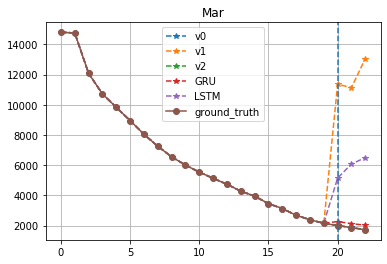

({'v0': array([14809.        , 14762.        , 12088.        , 10722.        ,
          9837.        ,  8958.        ,  8052.        ,  7256.        ,
          6559.        ,  6010.        ,  5546.        ,  5137.        ,
          4740.        ,  4285.        ,  3953.        ,  3459.        ,
          3133.        ,  2690.        ,  2390.        ,  2158.        ,
          2015.13789387,  1885.509905  ,  1736.58384071]),
  'v1': array([14809.        , 14762.        , 12088.        , 10722.        ,
          9837.        ,  8958.        ,  8052.        ,  7256.        ,
          6559.        ,  6010.        ,  5546.        ,  5137.        ,
          4740.        ,  4285.        ,  3953.        ,  3459.        ,
          3133.        ,  2690.        ,  2390.        ,  2158.        ,
         11362.26626487, 11142.13777396, 13062.17154804]),
  'v2': array([14809.        , 14762.        , 12088.        , 10722.        ,
          9837.        ,  8958.        ,  8052.        ,  725

In [14]:
result.plot_pred_by_dir(mar_min_sum, best_mar_folder, train=False, line_time=20, title='Mar')

## Separate RNN

In [26]:
jar_folder = os.path.abspath(os.path.join(os.getcwd(), '..', 'output', 'jar_separate_rnn_update'))
jar_result = result.Printer(jar_folder)
pd.options.display.max_rows = None
# a = jar_result.get_df(col=['train_loss', 'test_loss', 'mode']).sort_values('test_loss', ascending=True)
jar_df = jar_result.get_df(col=['final_sum_score', 'final_rmse_score', 'nlayers', 'nhid', 'minrmse', 'rnn_model', 'seq_length'], increase=False).sort_values('minrmse')
jar_df

final_sum_score final_rmse_score nlayers nhid  \
keras-rnn_07-09-21-02-17_9595         1559.37          127.843       1  100   
keras-rnn_07-09-21-02-17_5852         1899.04          158.833       1  100   
keras-rnn_07-09-21-02-17_0377         2575.47          171.927       2  100   
keras-rnn_07-09-21-02-17_9017         2661.46          200.852       2  100   
keras-rnn_07-09-21-02-17_1577         2939.26          215.486       3  100   
keras-rnn_07-09-21-02-17_0248         3073.36          207.304       4  100   
keras-rnn_07-09-21-02-17_5208         3117.12          234.134       3  100   
keras-rnn_07-09-21-02-17_6200         3190.48          246.232       4  100   
keras-rnn_07-09-21-02-17_5985         9821.59           609.15       3  100   
keras-rnn_07-09-21-02-17_4056         9820.97          616.126       2  100   
keras-rnn_07-09-21-02-17_9376         9826.89          620.878       2  100   
keras-rnn_07-09-21-02-17_2168         9823.84          612.044       4  100   
keras-rnn_07-09-21-02-17_2491         9812.04           564.21       3  100   
keras-rnn_07-09-21-02-17_1298         9812.01          562.321       4  100   
keras-rnn_07-09-21-02-17_9643         9812.97          578.229       3  100   
keras-rnn_07-09-21-02-17_0128         9819.57          613.874       3  100   
keras-rnn_07-09-21-02-17_3802         9812.34          568.241       2  100   
keras-rnn_07-09-21-02-17_0523         9812.34          565.326       3  100   
keras-rnn_07-09-21-02-17_3282         9812.39          568.641       2  100   
keras-rnn_07-09-21-02-17_9516         9812.52          572.768       4  100   
keras-rnn_07-09-21-02-17_9955         9821.01          610.705       3  100   
keras-rnn_07-09-21-02-17_6887         9819.86          603.366       2  100   
keras-rnn_07-09-21-02-17_4336          9821.4           623.95       4  100   
keras-rnn_07-09-21-02-17_1951         9826.81          613.838       4  100   
keras-rnn_07-09-21-02-17_9645         9825.27          624.219       1  100   
keras-rnn_07-09-21-02-17_1769         9905.62          633.355       2  100   
keras-rnn_07-09-21-02-17_1608         9817.52          606.291       1  100   
keras-rnn_07-09-21-02-17_8049         9823.17          630.574       1  100   
keras-rnn_07-09-21-02-17_2531          9821.2          638.376       1  100   
keras-rnn_07-09-21-02-17_5951         9825.04          639.319       1  100   
keras-rnn_07-09-21-02-17_2274         9812.57          571.508       4  100   
keras-rnn_07-09-21-02-17_2029         9816.11          608.508       1  100   

                                minrmse    rnn_model seq_length  
keras-rnn_07-09-21-02-17_9595  0.134446   GRU_Linear          2  
keras-rnn_07-09-21-02-17_5852  0.253273   GRU_Linear          5  
keras-rnn_07-09-21-02-17_0377  0.438003   GRU_Linear          2  
keras-rnn_07-09-21-02-17_9017  0.474102   GRU_Linear          5  
keras-rnn_07-09-21-02-17_1577  0.543853   GRU_Linear          2  
keras-rnn_07-09-21-02-17_0248  0.638037   GRU_Linear          5  
keras-rnn_07-09-21-02-17_5208  0.638749   GRU_Linear          5  
keras-rnn_07-09-21-02-17_6200  0.659237   GRU_Linear          2  
keras-rnn_07-09-21-02-17_5985   7.70311  LSTM_module          2  
keras-rnn_07-09-21-02-17_4056   7.70311  LSTM_Linear          2  
keras-rnn_07-09-21-02-17_9376   7.70314  LSTM_module          2  
keras-rnn_07-09-21-02-17_2168   7.70316  LSTM_module          2  
keras-rnn_07-09-21-02-17_2491   7.70316  LSTM_Linear          5  
keras-rnn_07-09-21-02-17_1298   7.70317  LSTM_Linear          5  
keras-rnn_07-09-21-02-17_9643   7.70318   GRU_module          5  
keras-rnn_07-09-21-02-17_0128   7.70318  LSTM_Linear          2  
keras-rnn_07-09-21-02-17_3802   7.70319  LSTM_module          5  
keras-rnn_07-09-21-02-17_0523   7.70321  LSTM_module          5  
keras-rnn_07-09-21-02-17_3282   7.70321  LSTM_Linear          5  
keras-rnn_07-09-21-02-17_9516   7.70322   GRU_module          5  
keras-rnn_07-09-21-02-17_9955   7.70

In [28]:
jar_rmse = {'GRU': 'keras-rnn_07-09-21-02-17_9595', 'LSTM': 'keras-rnn_07-09-21-02-17_5985'}
result.output_scr_by_dir(jar_rmse, jar_folder, minepoch='rmse', write='a', model='rnn')


In [4]:
feb_folder = os.path.abspath(os.path.join(os.getcwd(), '..', 'output', 'feb_separate_rnn_update'))
feb_result = result.Printer(feb_folder)
pd.options.display.max_rows = None
# a = feb_result.get_df(col=['train_loss', 'test_loss', 'mode']).sort_values('test_loss', ascending=True)
feb_df = feb_result.get_df(col=['final_sum_score', 'final_rmse_score', 'nlayers', 'nhid', 'minrmse', 'rnn_model', 'seq_length'], increase=False).sort_values('minrmse')
feb_dffeb_folder = os.path.abspath(os.path.join(os.getcwd(), '..', 'output', 'feb_separate_rnn_update'))
feb_result = result.Printer(feb_folder)
pd.options.display.max_rows = None
# a = feb_result.get_df(col=['train_loss', 'test_loss', 'mode']).sort_values('test_loss', ascending=True)
feb_df = feb_result.get_df(col=['final_sum_score', 'final_rmse_score', 'nlayers', 'nhid', 'minrmse', 'rnn_model', 'seq_length'], increase=False).sort_values('minrmse')
feb_df

final_sum_score final_rmse_score nlayers nhid  \
keras-rnn_07-09-21-43-07_8721         1487.21          170.202       1  100   
keras-rnn_07-09-21-43-07_2063         1288.71          201.446       2  100   
keras-rnn_07-09-21-43-07_4283         1143.13          152.477       1  100   
keras-rnn_07-09-21-43-07_5090         1164.74           188.55       1  100   
keras-rnn_07-09-21-43-07_8049         3555.46          372.662       2  100   
keras-rnn_07-09-21-43-07_4381         849.405          174.784       3  100   
keras-rnn_07-09-21-43-07_3324         1028.59          228.292       4  100   
keras-rnn_07-09-21-43-07_4147         1079.74          167.578       4  100   
keras-rnn_07-09-21-43-07_4705         1758.76          212.541       3  100   
keras-rnn_07-09-21-43-07_5929         1470.19          195.342       3  100   
keras-rnn_07-09-21-43-07_9502          1819.2          462.767       2  100   
keras-rnn_07-09-21-43-07_6886         1458.57          247.498       4  100   
keras-rnn_07-09-21-43-07_7112          9149.4          547.856       2  100   
keras-rnn_07-09-21-43-07_6692         9148.24          526.931       3  100   
keras-rnn_07-09-21-43-07_6242         9148.62          539.039       4  100   
keras-rnn_07-09-21-43-07_1515         9164.51          555.748       3  100   
keras-rnn_07-09-21-43-07_4524         9178.05          582.127       3  100   
keras-rnn_07-09-21-43-07_3940         9151.07          569.973       4  100   
keras-rnn_07-09-21-43-07_3698         9149.26          542.687       4  100   
keras-rnn_07-09-21-43-07_8963         9149.49          546.475       2  100   
keras-rnn_07-09-21-43-07_4279         9149.38          551.403       3  100   
keras-rnn_07-09-21-43-07_3202         9148.71          538.035       3  100   
keras-rnn_07-09-21-43-07_9424         9186.57          576.291       4  100   
keras-rnn_07-09-21-43-07_2363         9150.69          558.849       2  100   
keras-rnn_07-09-21-43-07_0957         9154.79          589.682       1  100   
keras-rnn_07-09-21-43-07_4314          9148.5          532.511       2  100   
keras-rnn_07-09-21-43-07_5603         9199.63          595.193       1  100   
keras-rnn_07-09-21-43-07_5823         9153.73          581.242       1  100   
keras-rnn_07-09-21-43-07_3724         9148.62          535.551       3  100   
keras-rnn_07-09-21-43-07_8080         9167.24          565.618       2  100   
keras-rnn_07-09-21-43-07_4698         9151.15          561.505       1  100   
keras-rnn_07-09-21-43-07_1800         9148.66          538.587       4  100   
keras-rnn_07-09-21-43-07_0753         9171.55          564.896       1  100   
keras-rnn_07-09-21-43-07_3785         9148.56          533.512       3  100   
keras-rnn_07-09-21-43-07_6260         9151.65          572.224       1  100   
keras-rnn_07-09-21-43-07_9295         9163.25          607.926       2  100   
keras-rnn_07-09-21-43-07_1845         9150.58          561.287       3  100   
keras-rnn_07-09-21-43-07_2042         9195.58          583.475       1  100   
keras-rnn_07-09-21-43-07_5784         9152.45           578.21       1  100   
keras-rnn_07-09-21-43-07_5323         9149.22          543.627       2  100   
keras-rnn_07-09-21-43-07_8878         9149.14          538.859       4  100   
keras-rnn_07-09-21-43-07_5972         9159.23          607.664       1  100   
keras-rnn_07-09-21-43-07_1345         9152.33          574.163       2  100   
keras-rnn_07-09-21-43-07_3436         9198.99          561.037       2  100   
keras-rnn_07-09-21-43-07_1253         9196.37          709.457       4  100   
keras-rnn_07-09-21-43-07_7379         9184.29          643.078       3  100   
keras-rnn_07-09-21-43-07_4092         9182.28          666.508       4  100   

                                   minrmse    rnn_model seq_length  
keras-rnn_07-09-21-43-07_8721  6.83342e-05   GRU_Linear          2  
keras-rnn_07-09-21-43-07_2063  0.000205116   GRU_Linear          2  
keras-rnn_07-09-21-43-07_4283 

In [ ]:
feb_folder = os.path.abspath(os.path.join(os.getcwd(), '..', 'output', 'feb_separate_rnn_update'))
feb_result = result.Printer(feb_folder)
pd.options.display.max_rows = None
# a = feb_result.get_df(col=['train_loss', 'test_loss', 'mode']).sort_values('test_loss', ascending=True)
feb_df = feb_result.get_df(col=['final_sum_score', 'final_rmse_score', 'nlayers', 'nhid', 'minrmse', 'rnn_model', 'seq_length'], increase=False).sort_values('minrmse')
feb_dffeb_folder = os.path.abspath(os.path.join(os.getcwd(), '..', 'output', 'feb_separate_rnn_update'))
feb_result = result.Printer(feb_folder)
pd.options.display.max_rows = None
# a = feb_result.get_df(col=['train_loss', 'test_loss', 'mode']).sort_values('test_loss', ascending=True)
feb_df = feb_result.get_df(col=['final_sum_score', 'final_rmse_score', 'nlayers', 'nhid', 'minrmse', 'rnn_model', 'seq_length'], increase=False).sort_values('minrmse')
feb_df

In [6]:
feb_rmse = {'GRU': 'keras-rnn_07-09-21-43-07_8721', 'LSTM': 'keras-rnn_07-09-21-43-07_6692'}
result.output_scr_by_dir(feb_rmse, feb_folder, minepoch='rmse', write='a', model='rnn')

In [26]:
mar_folder = os.path.abspath(os.path.join(os.getcwd(), '..', 'output', 'mar_separate_rnn_update'))
mar_result = result.Printer(mar_folder)
pd.options.display.max_rows = None
# a = mar_result.get_df(col=['train_loss', 'test_loss', 'mode']).sort_values('test_loss', ascending=True)
mar_df = mar_result.get_df(col=['final_sum_score', 'final_rmse_score', 'nlayers', 'nhid', 'minrmse', 'rnn_model', 'seq_length', 'reduce'], increase=False).sort_values('minrmse')
mar_df

final_sum_score final_rmse_score nlayers nhid  \
keras-rnn_07-09-16-44-02_9334         168.865          20.7454       1  100   
keras-rnn_07-09-16-44-02_1719         884.413          70.4117       3  100   
keras-rnn_07-09-16-44-02_0657         258.368          52.7226       1  100   
keras-rnn_07-09-16-44-02_9589         304.498          31.9607       3  100   
keras-rnn_07-09-16-44-02_7273         83.6688          19.2181       2  100   
keras-rnn_07-09-16-44-02_3977         753.753          75.9227       4  100   
keras-rnn_07-09-16-44-02_8508         77.1795          14.3195       3  100   
keras-rnn_07-09-16-44-02_1924         130.312          19.5255       4  100   
keras-rnn_07-09-16-44-02_6127         1030.74          84.7833       4  100   
keras-rnn_07-09-16-44-02_4327         190.323          26.5919       4  100   
keras-rnn_07-09-16-44-02_3537         499.008          51.9315       4  100   
keras-rnn_07-09-16-44-02_6688         273.701          67.1756       1  100   
keras-rnn_07-09-16-44-02_7148         102.626          18.2251       3  100   
keras-rnn_07-09-16-44-02_5487         349.336          31.6556       2  100   
keras-rnn_07-09-16-44-02_0136         306.632          41.6668       1  100   
keras-rnn_07-09-16-44-02_2412         168.067          28.9842       2  100   
keras-rnn_07-09-16-44-02_2987         826.419          65.6678       1  100   
keras-rnn_07-09-16-44-02_2970         2142.76          172.208       3  100   
keras-rnn_07-09-16-44-02_4840         315.532          66.2038       2  100   
keras-rnn_07-09-16-44-02_1780         176.077          21.9547       3  100   
keras-rnn_07-09-16-44-02_2579         134.859          25.9699       1  100   
keras-rnn_07-09-16-44-02_4215         921.829          76.0191       4  100   
keras-rnn_07-09-16-44-02_3424         348.525          40.9816       2  100   
keras-rnn_07-09-16-44-02_5559         455.421          57.2704       2  100   
keras-rnn_07-09-16-44-02_9692         169.118          30.1401       1  100   
keras-rnn_07-09-16-44-02_4010         908.842          74.5515       3  100   
keras-rnn_07-09-16-44-02_8382         367.248            42.57       2  100   
keras-rnn_07-09-16-44-02_8317         736.186          66.9779       1  100   
keras-rnn_07-09-16-44-02_3550         1715.67          160.169       3  100   
keras-rnn_07-09-16-44-02_2202         164.564          31.9387       2  100   
keras-rnn_07-09-16-44-02_7144         936.047          104.972       2  100   
keras-rnn_07-09-16-44-02_6194         327.484          36.2135       1  100   
keras-rnn_07-09-16-44-02_1313         361.887          47.4903       3  100   
keras-rnn_07-09-16-44-02_0441         798.521          69.5307       4  100   
keras-rnn_07-09-16-44-02_9314         305.107          82.4709       2  100   
keras-rnn_07-09-16-44-02_5432          1854.7          138.661       4  100   
keras-rnn_07-09-16-44-02_6777         195.752          44.4712       2  100   
keras-rnn_07-09-16-44-02_6518         257.899          65.7642       1  100   
keras-rnn_07-09-16-44-02_5049          335.21          77.7691       3  100   
keras-rnn_07-09-16-44-02_4705          474.01           81.226       4  100   
keras-rnn_07-09-16-44-02_9416          183.39          44.6525       3  100   
keras-rnn_07-09-16-44-02_6462         588.714          56.3961       1  100   
keras-rnn_07-09-16-44-02_6892         2420.26          213.843       4  100   
keras-rnn_07-09-16-44-02_8730         575.733          80.7768       4  100   
keras-rnn_07-09-16-44-02_7659         2510.91          172.514       2  100   
keras-rnn_07-09-16-44-02_0913         2510.94          174.782       4  100   
keras-rnn_07-09-16-44-02_9400         2518.68          192.466       1  100   
keras-rnn_07-09-16-44-02_5367         2510.43          174.257       3  100   

                                   minrmse    rnn_model seq_length reduce  
keras-rnn_07-09-16-44-02_9334  7.88763e-06  LSTM_Linear          2  False  
keras-

In [27]:
mar_rmse = {'LSTM': 'keras-rnn_07-09-16-44-02_9589', 'GRU': 'keras-rnn_07-09-16-44-02_1719'}

In [28]:
result.output_scr_by_dir(mar_rmse, mar_folder, minepoch='rmse', write='a', model='rnn')


## Jar

In [19]:
# datadir = 'data'
# dataset = 'jar'
# data, _ = get_time_data(datadir, dataset)
# data = data.numpy()

# plt.figure('ncov Dataset')
# plt.imshow(data[:, :, 0].T, aspect='auto', cmap='jet')
# plt.title('ncov Dataset')
# plt.xlabel('timestep')
# plt.colorbar()
# jar_rmse = {'v0': 'ori-stnn_05-10-17-40-20_9687', 'v1': 'v1-stnn_05-10-15-34-49_8058', 'v3': 'v3-stnn_05-10-17-40-29_1975'}
# jar_min_sum = {'v0': 'ori-stnn_05-10-17-40-20_1897', 'v1': 'v1-stnn_05-10-17-40-23_3861', 'v3': 'v3-stnn_05-10-17-40-28_5828'}
jar_folder = os.path.abspath(os.path.join(os.getcwd(), '..', 'output', 'ori_mar'))
jar_result = result.Printer(jar_folder)
pd.options.display.max_rows = None
# a = jar_result.get_df(col=['train_loss', 'test_loss', 'mode']).sort_values('test_loss', ascending=True)
jar_df = jar_result.get_df(col=['sum_loss', 'minsum', 'minrmse', 'activation', 'nlayers', 'nhid', 'activation', 'lambd', 'nz'], increase=False).sort_values('minrmse')
jar_df

sum_loss   minsum  minrmse activation nlayers  \
ori-stnn_06-17-19-11-04_3854  514.198  9.84681  12.1652    sigmoid       1   
ori-stnn_06-17-19-11-04_9925  401.385  42.5395  14.5476    sigmoid       1   
ori-stnn_06-17-19-11-04_1003  230.334  6.07441  15.9758    sigmoid       1   
ori-stnn_06-17-19-11-04_9697   1541.9  10.4636  23.1426       tanh       2   
ori-stnn_06-17-19-11-04_5194  378.511  2.03365  24.8973       tanh       2   
ori-stnn_06-17-19-11-04_2534  3921.03  6.24018  26.2432       tanh       2   
ori-stnn_06-17-19-11-04_2645  1186.18  4.22784  26.4465       tanh       2   
ori-stnn_06-17-19-11-04_5662  642.044  2.07226  27.0806       tanh       1   
ori-stnn_06-17-19-11-04_5304  3546.28  10.3044  28.0115       tanh       2   
ori-stnn_06-17-19-11-04_5459  645.311  12.2757  28.6993       tanh       1   
ori-stnn_06-17-19-11-04_5211  5874.46  10.6608  31.6761       tanh       2   
ori-stnn_06-17-19-11-04_0616  1782.83  107.357  32.6236       tanh       1   
ori-stnn_06-17-19-11-04_2958   2268.3  283.251  34.6571    sigmoid       1   
ori-stnn_06-17-19-11-04_4634  2478.54   1.0954  36.8257       tanh       3   
ori-stnn_06-17-19-11-04_2671  3230.77  15.8874  37.3198       tanh       2   
ori-stnn_06-17-19-11-04_5657  3294.08  8.09811  38.5527       tanh       3   
ori-stnn_06-17-19-11-04_2562  409.963  112.128  41.5085       tanh       1   
ori-stnn_06-17-19-11-04_1156  2665.51  21.6675  42.5353       tanh       3   
ori-stnn_06-17-19-11-04_2607  2467.28   678.59  45.8336    sigmoid       1   
ori-stnn_06-17-19-11-04_1083  2218.01  7.07326  46.0273       tanh       2   
ori-stnn_06-17-19-11-04_9509  3396.44  29.5338  49.9836       tanh       3   
ori-stnn_06-17-19-11-04_9077  1635.13  97.0825  51.0705    sigmoid       1   
ori-stnn_06-17-19-11-04_6361  818.414  36.0607  52.2108    sigmoid       2   
ori-stnn_06-17-19-11-04_6688  4720.74  20.3061  52.3091       tanh       3   
ori-stnn_06-17-19-11-04_1321  676.842  58.5618  52.4845    sigmoid       2   
ori-stnn_06-17-19-11-04_7126  720.935  24.7732  53.2022    sigmoid       2   
ori-stnn_06-17-19-11-04_3696  4937.19  14.5394  54.0551       tanh       3   
ori-stnn_06-17-19-11-04_0280  473.826  30.6385  54.3538    sigmoid       2   
ori-stnn_06-17-19-11-04_4601  527.584  23.9051  54.4922    sigmoid       2   
ori-stnn_06-17-19-11-04_1568  1610.39  28.9502  54.5223       tanh       3   
ori-stnn_06-17-19-11-04_0895  5763.73  24.4412  54.8591       tanh       3   
ori-stnn_06-17-19-11-04_2626  215.752  28.5333  55.5634    sigmoid       2   
ori-stnn_06-17-19-11-04_6620  383.036  40.9367  55.9873    sigmoid       2   
ori-stnn_06-17-19-11-04_9658  1272.26  112.821  56.2666    sigmoid       2   
ori-stnn_06-17-19-11-04_0311  409.102  70.5781  56.8454    sigmoid       3   
ori-stnn_06-17-19-11-04_0852  768.617  50.9684  56.8752    sigmoid       3   
ori-stnn_06-17-19-11-04_8581  907.089  63.9725  56.9954    sigmoid       3   
ori-stnn_06-17-19-11-04_5397  586.036  61.5572  57.0469    sigmoid       3   
ori-stnn_06-17-19-11-04_1897  5279.85   37.213  57.2181       tanh       2   
ori-stnn_06-17-19-11-04_2175  1735.07   19.953  57.3002    sigmoid       2   
ori-stnn_06-17-19-11-04_7575  1320.11  40.3628   57.461    sigmoid       2   
ori-stnn_06-17-19-11-04_8562  955.414   65.019  57.5051    sigmoid       3   
ori-stnn_06-17-19-11-04_7003  492.531  50.0307  57.5893    sigmoid       3   
ori-stnn_06-17-19-11-04_3287  312.158  43.7477  57.7477    sigmoid       3   
ori-stnn_06-17-19-11-04_1303  882.354  59.9798  57.7798    sigmoid       3   
ori-stnn_06-17-19-11-04_8866  392.494   62.978  57.8218    sigmoid       3   
ori-stnn_06-17-19-11-04_0929  525.256  64.0812  57.8558    sigmoid       3   
ori-stnn_06-17-19-11-04_5839    673.7  59.7248  58.1197    sigmoid       3   
ori-stnn_06-17-19-11-04_5986  328.614  65.4729  58.2864    sigmoid       3   
ori-stnn_06-17-19-11-04_6947  1963.96  17.9929  58.6448    sigmoid       2   
ori-stnn_06-17-19-11-04_3658  1896.52  23.3598  58.

In [20]:
jar_rmse = {'ori':'ori-stnn_06-17-19-11-04_3854'}
result.output_scr_by_dir(jar_rmse, jar_folder, minepoch='rmse', write='a')

1518
218
2738.5558811822116
14271.205807091073
3355.9202446704585


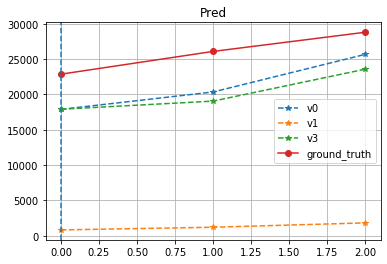

({'v0': array([17880.15332031, 20340.29001617, 25666.42227173]),
  'v1': array([ 817.57034269, 1194.88760614, 1812.22599837]),
  'v3': array([17896.95885468, 19046.58638   , 23569.67610168])},
 array([22859., 26079., 28793.]))

In [5]:
path = 'D:/Jupyter_Documents/ML-code/research_code/output/jar_3'
exp_name = 'ori-stnn_05-10-17-40-20_1897'
# exp_dir = {'test': exp_name}
jar_min_sum = {'v0': 'ori-stnn_05-10-17-40-20_1897', 'v1': 'v1-stnn_05-10-17-40-23_3861', 'v3': 'v3-stnn_05-10-17-40-28_5828'}
exp = result.Exp(exp_name, path)
# print(exp.config['mintest'])
print(exp.config['min_sum_epoch'])
print(exp.config['manualSeed'])
# print(exp.pred_loss())
result.plot_pred_by_dir(jar_min_sum, path, train=False, increase=False)

In [8]:
exp.draw_loss()

FileNotFoundError: [Errno 2] No such file or directory: 'D:/Jupyter_Documents/ML-code/research_code/output/jar_3\\ori-stnn_05-10-17-40-20_1897\\logs.json'

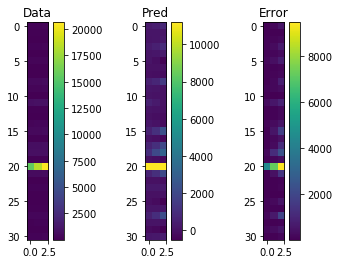

In [9]:
exp.plot_distribution()

## Feb

In [75]:
feb_rmse = {'v0': 'ori-stnn_05-10-17-38-30_9768', 'v1': 'v1-stnn_05-10-17-38-28_9093', 'v3': 'v3-stnn_05-10-17-38-33_0251'}
feb_sum = {'v0': 'ori-stnn_05-10-17-38-30_7738', 'v1': 'v1-stnn_05-10-17-38-28_6094', 'v3': 'v3-stnn_05-10-17-38-33_5930'}

feb_folder = os.path.abspath(os.path.join(os.getcwd(), '..', 'output', 'feb_3'))
feb_result = result.Printer(feb_folder)
pd.options.display.max_rows = 20
# a = feb_result.get_df(col=['train_loss', 'test_loss', 'mode']).sort_values('test_loss', ascending=True)
feb_df = feb_result.get_df(col=['sum_loss', 'minsum', 'minrmse', 'nhid', 'nlayers', 'nz', 'lambd', 'time_datas', 'manualSeed'], increase=False).sort_values('minrmse')
# feb_df = feb_result.get_df(col=['nlayers', 'nhid', 'nz', 'lambd', 'time_datas', 'activation'], increase=False)

feb_df



sum_loss   minsum  minrmse nhid nlayers  nz  \
ori-stnn_05-10-17-38-30_5447  742.393  160.214  30.5417  100       2  10   
ori-stnn_05-10-17-38-30_5058  3649.19  472.504  70.0058  100       4  10   
ori-stnn_05-10-17-38-29_3044  9341.17  355.751  71.1426  100       2  10   
v3-stnn_05-10-17-38-33_0251   11383.6  250.282  72.3394  100       2  10   
ori-stnn_05-10-17-38-30_9768  4026.65  767.619  80.8259  100       4  10   
...                               ...      ...      ...  ...     ...  ..   
ori-stnn_05-10-15-44-41_6135  8031.54  19465.5  2168.79  100       4  10   
v3-stnn_05-10-15-44-51_0820   7571.04  14655.6  2325.09   10       4  10   
ori-stnn_05-10-15-44-41_1827  4184.09  21955.1  2361.47   10       2  10   
ori-stnn_05-10-15-44-41_3910  9236.79  20471.8   2386.8   10       4  10   
ori-stnn_05-10-15-44-41_2844  4258.11    22015  2656.28   10       4  10   

                             lambd   time_datas manualSeed  
ori-stnn_05-10-17-38-30_5447   0.1  [confirmed]       9930  
ori-stnn_05-10-17-38-30_5058    10  [confirmed]       8304  
ori-stnn_05-10-17-38-29_3044    10  [confirmed]       4537  
v3-stnn_05-10-17-38-33_0251    0.1  [confirmed]        299  
ori-stnn_05-10-17-38-30_9768   0.1  [confirmed]       9303  
...                            ...          ...        ...  
ori-stnn_05-10-15-44-41_6135    10          all       6354  
v3-stnn_05-10-15-44-51_0820     10          all       2683  
ori-stnn_05-10-15-44-41_1827    10          all       9235  
ori-stnn_05-10-15-44-41_3910    10          all       5893  
ori-stnn_05-10-15-44-41_2844    10          all       7525  

[334 rows x 9 columns]

In [74]:
result.output_scr_by_dir(feb_rmse, feb_folder, minepoch='rmse', write='a')
# result.output_scr_by_dir(feb_min_sum, feb_folder, minepoch='sum', write='a')

9995
281.5994371670056
281.5994371670056


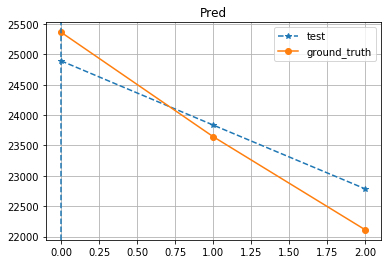

({'test': array([24893.02453613, 23835.34179688, 22783.72558594])},
 array([25364., 23644., 22109.]))

In [19]:
path = 'D:/Jupyter_Documents/ML-code/research_code/output_result/feb'
exp_name = 'v3-stnn_05-03-23-45-57_6570'
exp_dir = {'test': exp_name}
exp = result.Exp(exp_name, path)
# print(exp.config['mintest'])
# print(exp.config['minepoch'])
print(exp.config['manualSeed'])
print(exp.pred_loss())
result.plot_pred_by_dir(exp_dir, path, train=False, increase=False)

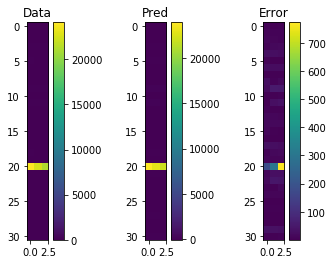

In [21]:
exp.plot_distribution()

## Mar

In [71]:
mar_rmse = {'v0': 'ori-stnn_05-10-17-38-30_9768', 'v1': 'v1-stnn_05-10-17-38-28_9093', 'v3': 'v3-stnn_05-10-17-38-33_0251'}
mar_sum = {'v0': 'ori-stnn_05-10-17-38-30_7738', 'v1': 'v1-stnn_05-10-17-38-28_6094', 'v3': 'v3-stnn_05-10-17-38-33_5930'}

mar_folder = os.path.abspath(os.path.join(os.getcwd(), '..', 'output', 'mar_3'))
mar_result = result.Printer(mar_folder)
pd.options.display.max_rows = 20
# a = mar_result.get_df(col=['train_loss', 'test_loss', 'mode']).sort_values('test_loss', ascending=True)
mar_df = mar_result.get_df(col=['sum_loss', 'minsum', 'minrmse', 'nhid', 'nlayers', 'nz', 'lambd', 'min_rmse_epoch'], increase=False).sort_values('minrmse')
# mar_df = mar_result.get_df(col=['nlayers', 'nhid', 'nz', 'lambd', 'time_datas', 'activation'], increase=False)

mar_df

sum_loss   minsum  minrmse nhid nlayers  nz  \
v3-stnn_05-11-00-11-02_5512   311.452  21.7597  2.51197    0       1  20   
v3-stnn_05-11-00-11-02_1755   2377.04  9.41803  2.65069    0       1  40   
v3-stnn_05-11-00-11-02_0252   935.994  6.60832  2.68927    0       1  40   
v3-stnn_05-11-00-11-02_0905    1310.9  26.3375  2.91386    0       1  20   
v3-stnn_05-11-00-11-02_3516   1351.92  4.50065  3.05517    0       1  20   
...                               ...      ...      ...  ...     ...  ..   
ori-stnn_05-10-17-41-37_6615  36462.4  8852.44   3495.8   10       4  10   
v3-stnn_05-10-15-41-21_1235   36472.4  6590.86   3544.9   10       4  10   
v3-stnn_05-10-15-41-21_7010   36396.9  8195.44  3585.54   10       4  10   
ori-stnn_05-10-17-41-37_2632  36362.9  9176.74   3608.9   10       4  10   
v3-stnn_05-10-17-41-58_7147   36480.1  9103.64  3627.94   10       4  10   

                             lambd min_rmse_epoch  
v3-stnn_05-11-00-11-02_5512     30           1587  
v3-stnn_05-11-00-11-02_1755     20           2918  
v3-stnn_05-11-00-11-02_0252     10            149  
v3-stnn_05-11-00-11-02_0905     30           2423  
v3-stnn_05-11-00-11-02_3516     30           1514  
...                            ...            ...  
ori-stnn_05-10-17-41-37_6615    10             12  
v3-stnn_05-10-15-41-21_1235    0.1            118  
v3-stnn_05-10-15-41-21_7010     10            597  
ori-stnn_05-10-17-41-37_2632   0.1           1984  
v3-stnn_05-10-17-41-58_7147     10           1606  

[899 rows x 8 columns]

## Classical Model

#### Jar

In [29]:
feb_folder = os.path.abspath(os.path.join(os.getcwd(), '..', 'output', 'feb0606'))
feb_result = result.Printer(feb_folder)
pd.options.display.max_rows = None
# a = feb_result.get_df(col=['train_loss', 'test_loss', 'mode']).sort_values('test_loss', ascending=True)
feb_df = feb_result.get_df(col=['activation', 'minsum', 'minrmse', 'nhid', 'nlayers', 'nz', 'lambd', 'data_normalize'], increase=False).sort_values('minrmse')
# feb_df = feb_result.get_df(col=['nlayers', 'nhid', 'nz', 'lambd', 'time_datas', 'activation'], increase=False)

feb_df

activation   minsum  minrmse nhid nlayers  nz  \
ori-stnn_06-07-01-01-12_8773       tanh  259.294  208.065    0       1  20   
ori-stnn_06-07-01-01-12_2437       tanh  145.286  231.496    0       1  20   
ori-stnn_06-07-01-01-12_5113       tanh   237.17  239.592    0       1  20   
ori-stnn_06-07-01-01-12_8057       tanh  215.263  247.217    0       1  20   
ori-stnn_06-07-01-01-12_0405       tanh  177.633  272.645    0       1  20   
ori-stnn_06-07-01-01-12_9688       tanh  213.172  299.326    0       1  10   
ori-stnn_06-07-01-01-12_9169       tanh  344.097  301.522    0       1  10   
ori-stnn_06-07-01-01-12_2522       tanh  361.582  302.502    0       1  10   
ori-stnn_06-07-01-01-12_9991       tanh  407.615  302.518    0       1  10   
ori-stnn_06-07-01-01-12_2931       tanh  136.564  325.962    0       1  10   
ori-stnn_06-07-01-01-12_8712       tanh  290.436  329.148    0       1  10   
ori-stnn_06-07-01-01-12_1455       tanh  589.754  932.508    0       1  20   
ori-stnn_06-07-01-01-12_7626       tanh  1179.39  954.265    0       1  10   
ori-stnn_06-07-01-01-12_5002       tanh  1334.27  996.187    0       1  10   
ori-stnn_06-07-01-01-12_9913       tanh  777.276  1000.42    0       1  20   
ori-stnn_06-07-01-01-12_8890       tanh  2456.02  1037.21    0       1  10   
ori-stnn_06-07-01-01-12_0331       tanh   698.61  1196.22    0       1  20   

                             lambd data_normalize  
ori-stnn_06-07-01-01-12_8773    30              d  
ori-stnn_06-07-01-01-12_2437    30              d  
ori-stnn_06-07-01-01-12_5113    20              d  
ori-stnn_06-07-01-01-12_8057    10              d  
ori-stnn_06-07-01-01-12_0405    20              d  
ori-stnn_06-07-01-01-12_9688    30              d  
ori-stnn_06-07-01-01-12_9169    20              d  
ori-stnn_06-07-01-01-12_2522    10              d  
ori-stnn_06-07-01-01-12_9991    20              d  
ori-stnn_06-07-01-01-12_2931    30              d  
ori-stnn_06-07-01-01-12_8712    10              d  
ori-stnn_06-07-01-01-12_1455    20              d  
ori-stnn_06-07-01-01-12_7626    20              d  
ori-stnn_06-07-01-01-12_5002    30              d  
ori-stnn_06-07-01-01-12_9913    30              d  
ori-stnn_06-07-01-01-12_8890    10              d  
ori-stnn_06-07-01-01-12_0331    10              d

# RNN

In [7]:
mar_rnn = {'keras1': 'keras-rnn_05-09-16-50-18_9254', 'keras2': 'keras-rnn_05-09-16-50-18_6213'}
feb_rnn = {'keras1': 'keras-rnn_05-10-15-45-12_0911', 'keras2': 'keras-rnn_05-10-15-45-12_4449'}
jar_rnn = {'keras1': 'keras-rnn_05-09-16-47-47_5547', 'keras2': 'keras-rnn_05-09-16-47-47_1851'}

result.output_scr_by_dir(mar_rnn, rnn_mar_folder, configs=['rnn_model', 'activation', 'batch_size', 'dataset', 'increase', 'lr', 'manualSeed', 'nhid', 'nlayers', 'nt_train', 'start_time'], minepoch='rmse')
result.output_scr_by_dir(feb_rnn, rnn_feb_folder, write='a', configs=['rnn_model', 'activation', 'batch_size', 'dataset', 'increase', 'lr', 'manualSeed', 'nhid', 'nlayers', 'nt_train', 'start_time'], minepoch='rmse')
result.output_scr_by_dir(jar_rnn, rnn_jar_folder, write='a', configs=['rnn_model', 'activation', 'batch_size', 'dataset', 'increase', 'lr', 'manualSeed', 'nhid', 'nlayers', 'nt_train', 'start_time'], minepoch='rmse')



In [6]:
rnn_mar_folder = os.path.abspath(os.path.join(os.getcwd(), '..', 'output', 'rnn_mar_3'))
rnn_feb_folder = os.path.abspath(os.path.join(os.getcwd(), '..', 'output', 'rnn_feb_3'))
rnn_jar_folder = os.path.abspath(os.path.join(os.getcwd(), '..', 'output', 'rnn_jar_3'))


In [ ]:
datadir = 'data'
dataset = 'mar'
data, _ = get_time_data(datadir, dataset)
data = data.numpy()

# plt.figure('ncov Dataset')
# plt.imshow(data[:, :, 0].T, aspect='auto', cmap='jet')
# plt.title('ncov Dataset')
# plt.xlabel('timestep')
# plt.colorbar()

mar_folder = os.path.abspath(os.path.join(os.getcwd(), '..', 'output', 'rnn_mar_3'))
mar_result = result.Printer(mar_folder)
pd.options.display.max_rows = None
minsum = {'v0': 'ori-stnn_05-11-00-17-30_7377', 'v3': 'v3-stnn_05-11-00-17-30_0015', 'v1': 'v1-stnn_05-11-00-17-30_7250'}

# a = mar_result.get_df(col=['train_loss', 'test_loss', 'mode']).sort_values('test_loss', ascending=True)
mar_df = mar_result.get_df(col=['sum_loss', 'minsum', 'minrmse', 'data_normalize', 'time_datas', 'activation'], increase=False).sort_values('minsum')
mar_df

In [13]:
datadir = 'data'
dataset = 'feb'
data, _ = get_time_data(datadir, dataset)
data = data.numpy()

# plt.figure('ncov Dataset')
# plt.imshow(data[:, :, 0].T, aspect='auto', cmap='jet')
# plt.title('ncov Dataset')
# plt.xlabel('timestep')
# plt.colorbar()

feb_folder = os.path.abspath(os.path.join(os.getcwd(), '..', 'output', 'feb0606'))
feb_result = result.Printer(feb_folder)
pd.options.display.max_rows = None
feb_sum = {'v0': 'ori-stnn_05-11-00-10-31_1950', 'v3': 'v3-stnn_05-11-00-11-02_6075', 'v1': 'v1-stnn_05-11-00-11-02_4351'}
feb_rmse = {'v0': 'ori-stnn_05-11-00-10-31_1950', 'v3': 'v3-stnn_05-11-00-11-02_6075', 'v1': 'v1-stnn_05-11-00-11-02_4351'}

# a = feb_result.get_df(col=['train_loss', 'test_loss', 'mode']).sort_values('test_loss', ascending=True)
feb_df = feb_result.get_df(col=['nt_train', 'nhid', 'minsum', 'minrmse', 'data_normalize', 'nlayers', 'activation'], increase=False).sort_values('minrmse')
feb_df

nt_train nhid   minsum  minrmse data_normalize  \
ori-stnn_06-07-01-01-12_8773       33    0  259.294  208.065              d   
ori-stnn_06-07-01-01-12_2437       33    0  145.286  231.496              d   
ori-stnn_06-07-01-01-12_5113       33    0   237.17  239.592              d   
ori-stnn_06-07-01-01-12_8057       33    0  215.263  247.217              d   
ori-stnn_06-07-01-01-12_0405       33    0  177.633  272.645              d   
ori-stnn_06-07-01-01-12_9688       33    0  213.172  299.326              d   
ori-stnn_06-07-01-01-12_9169       33    0  344.097  301.522              d   
ori-stnn_06-07-01-01-12_2522       33    0  361.582  302.502              d   
ori-stnn_06-07-01-01-12_9991       33    0  407.615  302.518              d   
ori-stnn_06-07-01-01-12_2931       33    0  136.564  325.962              d   
ori-stnn_06-07-01-01-12_8712       33    0  290.436  329.148              d   
ori-stnn_06-07-01-01-12_1455       33    0  589.754  932.508              d   
ori-stnn_06-07-01-01-12_7626       33    0  1179.39  954.265              d   
ori-stnn_06-07-01-01-12_5002       33    0  1334.27  996.187              d   
ori-stnn_06-07-01-01-12_9913       33    0  777.276  1000.42              d   
ori-stnn_06-07-01-01-12_8890       33    0  2456.02  1037.21              d   
ori-stnn_06-07-01-01-12_0331       33    0   698.61  1196.22              d   

                             nlayers activation  
ori-stnn_06-07-01-01-12_8773       1       tanh  
ori-stnn_06-07-01-01-12_2437       1       tanh  
ori-stnn_06-07-01-01-12_5113       1       tanh  
ori-stnn_06-07-01-01-12_8057       1       tanh  
ori-stnn_06-07-01-01-12_0405       1       tanh  
ori-stnn_06-07-01-01-12_9688       1       tanh  
ori-stnn_06-07-01-01-12_9169       1       tanh  
ori-stnn_06-07-01-01-12_2522       1       tanh  
ori-stnn_06-07-01-01-12_9991       1       tanh  
ori-stnn_06-07-01-01-12_2931       1       tanh  
ori-stnn_06-07-01-01-12_8712       1       tanh  
ori-stnn_06-07-01-01-12_1455       1       tanh  
ori-stnn_06-07-01-01-12_7626       1       tanh  
ori-stnn_06-07-01-01-12_5002       1       tanh  
ori-stnn_06-07-01-01-12_9913       1       tanh  
ori-stnn_06-07-01-01-12_8890       1       tanh  
ori-stnn_06-07-01-01-12_0331       1       tanh

In [15]:
min_sum = {'classical':'ori-stnn_06-07-01-01-12_2437'}
result.output_scr_by_dir(min_sum, feb_folder, minepoch='sum', write='a')

In [116]:
mar_min_sum = {'v0': 'ori-stnn_05-11-00-10-31_1950', 'v3': 'v3-stnn_05-11-00-11-02_6075', 'v1': 'v1-stnn_05-11-00-11-02_4351'}
mar_min_rmse = {'v0': 'ori-stnn_05-11-00-10-31_1950', 'v3': 'v3-stnn_05-11-00-11-02_6075', 'v1': 'v1-stnn_05-11-00-11-02_4351'}

In [117]:
result.output_scr_by_dir(mar_min_sum, mar_folder, minepoch='sum')
result.output_scr_by_dir(mar_min_rmse, mar_folder, minepoch='rmse', write='a')
# result.output_scr_by_dir(mar_min_sum, mar_folder, write='a')

# RNN

## Jar

In [11]:
rnn_jar_folder = os.path.abspath(os.path.join(os.getcwd(), '..', 'output', 'rnn_jar_3'))
rnn_jar_result = result.Printer(rnn_jar_folder)
pd.options.display.max_rows = None

# a = jar_result.get_df(col=['train_loss', 'test_loss', 'mode']).sort_values('test_loss', ascending=True)
rnn_jar_df = rnn_jar_result.get_df(col=['sum_loss', 'true_rmse_loss', 'minrmse', 'activation', 'rnn_model', 'nepoch'], increase=False).sort_values('minrmse')
rnn_jar_df

sum_loss true_rmse_loss    minrmse activation  \
keras-rnn_05-09-16-47-47_5547  6800.61        1757.26  0.0232049       tanh   
keras-rnn_05-09-16-47-47_6114  6225.18        2888.68  0.0492314       tanh   
keras-rnn_05-09-16-47-47_2009  3133.45        10659.2   0.249983       tanh   
keras-rnn_05-09-16-47-47_2797  3245.28        10405.3   0.377749       tanh   
keras-rnn_05-09-16-47-47_5835   2416.1          12561    20.5018       tanh   
keras-rnn_05-09-16-47-47_6028   2416.1          12561    20.5018       tanh   
keras-rnn_05-09-16-47-47_1851   2416.1          12561    20.5018       tanh   
keras-rnn_05-09-16-47-47_3001   2416.1          12561    20.5018       tanh   
keras-rnn_05-09-16-47-47_3300   2416.1          12561    20.5018       tanh   
keras-rnn_05-09-16-47-47_3545   2416.1          12561    20.5018       tanh   
keras-rnn_05-09-16-47-47_8836   2416.1          12561    20.5018       tanh   
keras-rnn_05-09-16-47-47_7712  1639.27        15208.7    25.8339       tanh   
keras-rnn_05-09-16-47-47_7192  1589.05        15337.8    26.0958       tanh   
keras-rnn_05-09-16-47-47_9365  1595.06        15545.1     30.259       tanh   
keras-rnn_05-09-16-47-47_7673  1745.22          14799    30.5097       tanh   
keras-rnn_05-09-16-47-47_8019  1610.89        15463.6    33.2354       tanh   

                                 rnn_model nepoch  
keras-rnn_05-09-16-47-47_5547   GRU_Linear  10000  
keras-rnn_05-09-16-47-47_6114   GRU_Linear  10000  
keras-rnn_05-09-16-47-47_2009   GRU_Linear  10000  
keras-rnn_05-09-16-47-47_2797   GRU_Linear  10000  
keras-rnn_05-09-16-47-47_5835   GRU_module  10000  
keras-rnn_05-09-16-47-47_6028   GRU_module  10000  
keras-rnn_05-09-16-47-47_1851  LSTM_Linear  10000  
keras-rnn_05-09-16-47-47_3001   GRU_module  10000  
keras-rnn_05-09-16-47-47_3300  LSTM_Linear  10000  
keras-rnn_05-09-16-47-47_3545  LSTM_module  10000  
keras-rnn_05-09-16-47-47_8836  LSTM_module  10000  
keras-rnn_05-09-16-47-47_7712  LSTM_module  10000  
keras-rnn_05-09-16-47-47_7192  LSTM_Linear  10000  
keras-rnn_05-09-16-47-47_9365  LSTM_module  10000  
keras-rnn_05-09-16-47-47_7673   GRU_module  10000  
keras-rnn_05-09-16-47-47_8019  LSTM_Linear  10000

In [10]:
rnn_feb_folder = os.path.abspath(os.path.join(os.getcwd(), '..', 'output', 'rnn_feb_3'))
rnn_feb_result = result.Printer(rnn_feb_folder)
pd.options.display.max_rows = None

# a = feb_result.get_df(col=['train_loss', 'test_loss', 'mode']).sort_values('test_loss', ascending=True)
rnn_feb_df = rnn_feb_result.get_df(col=['sum_loss', 'true_rmse_loss', 'minrmse', 'activation', 'rnn_model', 'nepoch'], increase=False).sort_values('minrmse')
rnn_feb_df

sum_loss true_rmse_loss      minrmse activation  \
keras-rnn_05-10-15-45-12_0911  9252.72        19508.1  7.76329e-07       tanh   
keras-rnn_05-10-15-45-12_8853  15591.4        3233.04  2.13122e-06       tanh   
keras-rnn_05-10-15-45-12_7542  17996.7         885.86  2.72736e-06       tanh   
keras-rnn_05-10-15-45-12_7662  17174.8        521.638  3.66075e-06       tanh   
keras-rnn_05-10-15-45-12_4449  17582.7        782.032  7.46714e-06       tanh   
keras-rnn_05-10-15-45-12_0421  15500.9        3314.05  1.07377e-05       tanh   
keras-rnn_05-10-15-45-12_9048  13753.9        6416.12  1.43419e-05       tanh   
keras-rnn_05-10-15-45-12_4354    18779        2170.64  1.44537e-05       tanh   
keras-rnn_05-10-15-45-12_2338    17893        717.198  1.90231e-05       tanh   
keras-rnn_05-10-15-45-12_9585    18790        2184.46  2.33409e-05       tanh   
keras-rnn_05-10-15-45-12_7267  12591.7         8358.9   2.7823e-05       tanh   
keras-rnn_05-10-15-45-12_3098    16165        2383.86  2.97083e-05       tanh   
keras-rnn_05-10-15-45-12_9124  15449.4        3429.86  3.48543e-05       tanh   
keras-rnn_05-10-15-45-12_6042  21005.2         5493.6  3.70129e-05       tanh   
keras-rnn_05-10-15-45-12_0172  14882.2        4387.19  5.57429e-05       tanh   
keras-rnn_05-10-15-45-12_3230  13855.8        10366.9   5.6055e-05       tanh   
keras-rnn_05-10-15-45-12_4718  17490.4        953.266  5.74979e-05       tanh   
keras-rnn_05-10-15-45-12_0891  20167.7        4426.49  6.03783e-05       tanh   
keras-rnn_05-09-16-47-07_7713  5668.96        7014.91   6.4891e-05       tanh   
keras-rnn_05-10-15-45-12_0914  9708.96        14972.1  7.78725e-05       tanh   
keras-rnn_05-10-15-45-12_9766  13592.1        6639.24  9.44087e-05       tanh   
keras-rnn_05-10-15-45-12_0715  18257.7        2135.88  0.000102659       tanh   
keras-rnn_05-09-16-47-07_7735  8981.75        2178.24  0.000145034       tanh   
keras-rnn_05-09-16-47-07_5639  3612.55        13847.3  0.000151852       tanh   
keras-rnn_05-09-16-47-07_1464  5298.51        8231.42  0.000288028       tanh   
keras-rnn_05-09-16-47-07_3001   2614.7        22207.4  0.000288609       tanh   
keras-rnn_05-09-16-47-07_4603  5282.51        8010.86  0.000304002       tanh   
keras-rnn_05-09-16-47-07_2426  1910.16        18579.6  0.000368317       tanh   
keras-rnn_05-09-16-47-07_5278  4953.77         8980.8  0.000392334       tanh   
keras-rnn_05-09-16-47-07_7702  5072.88        8466.38   0.00045997       tanh   
keras-rnn_05-10-15-45-12_0741  16894.8        2520.11  0.000556552       tanh   
keras-rnn_05-09-16-47-07_6871   1984.9        24145.5   0.00059349       tanh   
keras-rnn_05-10-15-45-12_3436  12900.7        7827.12   0.00064754       tanh   
keras-rnn_05-09-16-47-07_0053  1978.94        23412.6  0.000824547       tanh   
keras-rnn_05-09-16-47-07_1225  2025.12        24592.5   0.00136658       tanh   
keras-rnn_05-09-16-47-07_6012  2484.68        20778.1   0.00188522       tanh   
keras-rnn_05-10-15-45-12_0521  8031.66        19921.3   0.00195517       tanh   
keras-rnn_05-09-16-47-07_0500  1857.27        23691.3   0.00379704       tanh   
keras-rnn_05-09-16-47-07_5727  2730.75        16362.5   0.00447522       tanh   
keras-rnn_05-09-16-47-07_7551  4251.24        10677.6   0.00645523       tanh   
keras-rnn_05-09-16-47-07_9331  4053.43        11552.3    0.0141592       tanh   
keras-rnn_05-09-16-47-07_5013  5315.89        8078.08    0.0144344       tanh   
keras-rnn_05-09-16-47-07_6011  1251.26        19864.3    0.0175123       tanh   
keras-rnn_05-09-16-47-07_1797  3937.96        11811.9      0.01808       tanh   
keras-rnn_05-09-16-47-07_9501   1914.7          18268    0.0213518       tanh   
keras-rnn_05-09-16-47-07_4255  2952.57        17608.1     0.035274       tanh   
keras-rnn_05-09-16-47-07_3967  2658.83        20949.7    0.0439642       tanh   
keras-rnn_05-09-16-47-07_2418   2075.7        18091.8    0.0695511       tanh   

                                 rnn_model nepoch  
keras-rn

In [9]:
rnn_mar_folder = os.path.abspath(os.path.join(os.getcwd(), '..', 'output', 'rnn_mar_3'))
rnn_mar_result = result.Printer(rnn_mar_folder)
pd.options.display.max_rows = None

# a = mar_result.get_df(col=['train_loss', 'test_loss', 'mode']).sort_values('test_loss', ascending=True)
rnn_mar_df = rnn_mar_result.get_df(col=['minrmse', 'activation', 'rnn_model', 'nepoch', 'nt_train', 'nhid', 'nlayers', 'min_rmse_epoch'], increase=False).sort_values('minrmse')
rnn_mar_df

minrmse activation    rnn_model nepoch  \
keras-rnn_05-12-18-28-01_3329  1.29239e-08       tanh   GRU_Linear  10000   
keras-rnn_05-12-18-28-01_9709  4.62614e-07       tanh   GRU_Linear  10000   
keras-rnn_05-12-18-28-01_3191  4.66055e-07       tanh   GRU_Linear  10000   
keras-rnn_05-12-18-28-01_5260   4.6713e-07       tanh   GRU_Linear  10000   
keras-rnn_05-12-18-28-01_7004    1.183e-06       tanh   GRU_Linear  10000   
keras-rnn_05-12-18-28-01_2189  1.34517e-06       tanh   GRU_Linear  10000   
keras-rnn_05-12-18-28-01_9884    0.0261305       tanh  LSTM_module  10000   
keras-rnn_05-12-18-28-01_9514    0.0261305       tanh   GRU_module  10000   
keras-rnn_05-12-18-28-01_8765    0.0261306       tanh  LSTM_Linear  10000   
keras-rnn_05-12-18-28-01_3821    0.0261306       tanh   GRU_module  10000   
keras-rnn_05-12-18-28-01_7067    0.0261307       tanh   GRU_module  10000   
keras-rnn_05-12-18-28-01_1533    0.0261308       tanh   GRU_module  10000   
keras-rnn_05-12-18-28-01_0925    0.0261322       tanh  LSTM_module  10000   
keras-rnn_05-12-18-28-01_5367    0.0261323       tanh   GRU_module  10000   
keras-rnn_05-12-18-28-01_9633    0.0261355       tanh  LSTM_module  10000   
keras-rnn_05-12-18-28-01_1020     0.026138       tanh  LSTM_Linear  10000   
keras-rnn_05-12-18-28-01_2554     0.026146       tanh   GRU_module  10000   

                              nt_train nhid nlayers min_rmse_epoch  
keras-rnn_05-12-18-28-01_3329       68  100       2           2108  
keras-rnn_05-12-18-28-01_9709       68  100       1           2387  
keras-rnn_05-12-18-28-01_3191       68  100       2            815  
keras-rnn_05-12-18-28-01_5260       68  100       2           9503  
keras-rnn_05-12-18-28-01_7004       68  100       1            126  
keras-rnn_05-12-18-28-01_2189       68  100       1            283  
keras-rnn_05-12-18-28-01_9884       68  100       2           5010  
keras-rnn_05-12-18-28-01_9514       68  100       2           8552  
keras-rnn_05-12-18-28-01_8765       68  100       2           8281  
keras-rnn_05-12-18-28-01_3821       68  100       1           9595  
keras-rnn_05-12-18-28-01_7067       68  100       2           7812  
keras-rnn_05-12-18-28-01_1533       68  100       1           4274  
keras-rnn_05-12-18-28-01_0925       68  100       1           9368  
keras-rnn_05-12-18-28-01_5367       68  100       2           9997  
keras-rnn_05-12-18-28-01_9633       68  100       1           7971  
keras-rnn_05-12-18-28-01_1020       68  100       1           9256  
keras-rnn_05-12-18-28-01_2554       68  100       1           8500

In [7]:
# rnn_jar_min = {'LSTM': 'keras-rnn_05-09-16-47-47_1851', 'GRU': 'keras-rnn_05-09-16-47-47_5547'}
# rnn_feb_min = {'LSTM': 'keras-rnn_05-10-15-45-12_4449', 'GRU': 'keras-rnn_05-10-15-45-12_0911'}
rnn_mar_min = {'LSTM': 'keras-rnn_05-12-18-28-01_9884', 'GRU': 'keras-rnn_05-12-18-28-01_3329'}

# result.output_scr_by_dir(rnn_jar_min, rnn_jar_folder, minepoch='rmse', model='rnn')
# result.output_scr_by_dir(rnn_feb_min, rnn_feb_folder, minepoch='rmse', model='rnn', write='a')
result.output_scr_by_dir(rnn_mar_min, rnn_mar_folder, minepoch='rmse', model='rnn', write='w')

## Get rmse loss and sum loss

In [20]:
reduce_jar_folder = os.path.abspath(os.path.join(os.getcwd(), '..', 'output_result', 'reduce_jar'))
jar_result = result.Printer(reduce_jar_folder)
# jar_result.process_config()
pd.options.display.max_rows = None
jar_df = jar_result.get_df(col=['rmse_val_loss', 'rmse_test_loss', 'sum_val_loss', 'sum_test_loss', 'rnn_model', 'nhid', 'nlayers','activation', 'nz'], increase=False)
jar_df

rmse_val_loss rmse_test_loss sum_val_loss  \
classical-stnn_07-10-23-16-20_7910        889.16        10714.2      12429.5   
keras-rnn_07-11-01-24-42_5547              1e+08          1e+08      162.775   
keras-rnn_07-11-01-25-19_1851              1e+08          1e+08      6982.98   
keras-rnn_07-11-01-26-09_9595            177.019        426.193      2510.84   
keras-rnn_07-11-01-27-01_5985             628.63        1012.72      11508.3   
ori-stnn_07-11-09-02-22_4935             233.187        476.415      4350.72   
v3-stnn_07-11-09-12-03_5128              243.882        514.164      4398.91   

                                   sum_test_loss    rnn_model nhid nlayers  \
classical-stnn_07-10-23-16-20_7910        160956          NaN  100       3   
keras-rnn_07-11-01-24-42_5547            636.368   GRU_Linear  100       1   
keras-rnn_07-11-01-25-19_1851            10281.8  LSTM_Linear  100       1   
keras-rnn_07-11-01-26-09_9595            5728.92   GRU_Linear  100       1   
keras-rnn_07-11-01-27-01_5985            15735.6  LSTM_module  100       3   
ori-stnn_07-11-09-02-22_4935             7447.91          NaN  100       2   
v3-stnn_07-11-09-12-03_5128              7971.68          NaN  100       2   

                                   activation   nz  
classical-stnn_07-10-23-16-20_7910    sigmoid   40  
keras-rnn_07-11-01-24-42_5547            tanh  NaN  
keras-rnn_07-11-01-25-19_1851            tanh  NaN  
keras-rnn_07-11-01-26-09_9595            tanh  NaN  
keras-rnn_07-11-01-27-01_5985            tanh  NaN  
ori-stnn_07-11-09-02-22_4935             tanh   10  
v3-stnn_07-11-09-12-03_5128              tanh   10

In [19]:
reduce_feb_folder = os.path.abspath(os.path.join(os.getcwd(), '..', 'output_result', 'reduce_feb'))
feb_result = result.Printer(reduce_feb_folder)
# feb_result.process_config()
pd.options.display.max_rows = None
feb_df = feb_result.get_df(col=['rmse_val_loss', 'rmse_test_loss', 'sum_val_loss', 'sum_test_loss', 'rnn_model', 'nhid', 'nlayers','activation', 'nz'], increase=False)
feb_df

rmse_val_loss rmse_test_loss sum_val_loss  \
classical-stnn_06-18-17-26-18_8849       2407.28         2649.9      8905.69   
keras-rnn_07-11-01-35-54_8220              1e+08          1e+08      400.352   
keras-rnn_07-11-01-37-57_4449              1e+08          1e+08      397.969   
keras-rnn_07-11-01-39-08_1486            134.191        190.087      873.956   
keras-rnn_07-11-01-39-45_6692            536.986        389.606       9126.8   
ori-stnn_05-12-16-06-12_0454             316.211        640.481      5616.06   
v3-stnn_05-12-16-58-50_8071              880.542        991.935      6253.18   

                                   sum_test_loss    rnn_model nhid nlayers  \
classical-stnn_06-18-17-26-18_8849       9264.77          NaN   50       3   
keras-rnn_07-11-01-35-54_8220            1301.61   GRU_module  100       1   
keras-rnn_07-11-01-37-57_4449            2340.85  LSTM_Linear  100       2   
keras-rnn_07-11-01-39-08_1486            2133.65   GRU_Linear  100       1   
keras-rnn_07-11-01-39-45_6692            5226.55  LSTM_module  100       3   
ori-stnn_05-12-16-06-12_0454             6898.86          NaN  100       4   
v3-stnn_05-12-16-58-50_8071              2478.59          NaN  100       2   

                                   activation   nz  
classical-stnn_06-18-17-26-18_8849    sigmoid   10  
keras-rnn_07-11-01-35-54_8220            tanh  NaN  
keras-rnn_07-11-01-37-57_4449            tanh  NaN  
keras-rnn_07-11-01-39-08_1486            tanh  NaN  
keras-rnn_07-11-01-39-45_6692            tanh  NaN  
ori-stnn_05-12-16-06-12_0454          sigmoid   10  
v3-stnn_05-12-16-58-50_8071           sigmoid   10

In [18]:
reduce_mar_folder = os.path.abspath(os.path.join(os.getcwd(), '..', 'output_result', 'reduce_mar'))
mar_result = result.Printer(reduce_mar_folder)
# mar_result.process_config()
pd.options.display.max_rows = None
mar_df = mar_result.get_df(col=['rmse_val_loss', 'rmse_test_loss', 'sum_val_loss', 'sum_test_loss', 'rnn_model', 'nhid', 'nlayers','activation', 'nz'], increase=False)
mar_df

rmse_val_loss rmse_test_loss sum_val_loss  \
classical-stnn_06-18-17-25-23_1864       96.0349        76.1929      980.201   
keras-rnn_07-11-01-42-00_3329              1e+08          1e+08       19.094   
keras-rnn_07-11-01-43-37_9884              1e+08          1e+08      2367.14   
keras-rnn_07-11-08-53-57_1719            16.0642        55.8313      73.4348   
keras-rnn_07-11-08-55-38_9589            94.3494        348.432      1699.15   
ori-stnn_05-12-18-19-44_4341             3.22382        18.7169      9.80276   
v3-stnn_05-12-18-19-44_7937              3.47399        8.99266      33.2616   

                                   sum_test_loss    rnn_model nhid nlayers  \
classical-stnn_06-18-17-25-23_1864        317.14          NaN   50       3   
keras-rnn_07-11-01-42-00_3329            264.146   GRU_Linear  100       2   
keras-rnn_07-11-01-43-37_9884            2775.75  LSTM_module  100       2   
keras-rnn_07-11-08-53-57_1719            721.351   GRU_module  100       3   
keras-rnn_07-11-08-55-38_9589            5312.77  LSTM_Linear  100       3   
ori-stnn_05-12-18-19-44_4341              291.12          NaN    0       1   
v3-stnn_05-12-18-19-44_7937              54.3585          NaN    0       1   

                                   activation   nz  
classical-stnn_06-18-17-25-23_1864    sigmoid   10  
keras-rnn_07-11-01-42-00_3329            tanh  NaN  
keras-rnn_07-11-01-43-37_9884            tanh  NaN  
keras-rnn_07-11-08-53-57_1719            tanh  NaN  
keras-rnn_07-11-08-55-38_9589            tanh  NaN  
ori-stnn_05-12-18-19-44_4341          sigmoid   40  
v3-stnn_05-12-18-19-44_7937              tanh   40

In [ ]:
path = 'D:/Jupyter_Documents/ML-code/research_code/output/jar_3'
exp_name = 'ori-stnn_05-10-17-40-20_1897'
# exp_dir = {'test': exp_name}
jar_min_sum = {'v0': 'ori-stnn_05-10-17-40-20_1897', 'v1': 'v1-stnn_05-10-17-40-23_3861', 'v3': 'v3-stnn_05-10-17-40-28_5828'}
exp = result.Exp(exp_name, path)
# print(exp.config['mintest'])
print(exp.config['min_sum_epoch'])
print(exp.config['manualSeed'])
# print(exp.pred_loss())
result.plot_pred_by_dir(jar_min_sum, path, train=False, increase=False)